In [10]:
import caret_analyze as caret
import caret_analyze.plot as caret_plot

app = caret.Application('architecture.yaml', 'yaml', None)

In [11]:
start_callback_name = '/sensor_dummy_node/timer_callback_0'
end_callback_name = '/actuator_dummy_node/subscription_callback_0'
paths = app.search_paths(start_callback_name, end_callback_name)
len(paths)  # 見つかったパスの数を出力

1

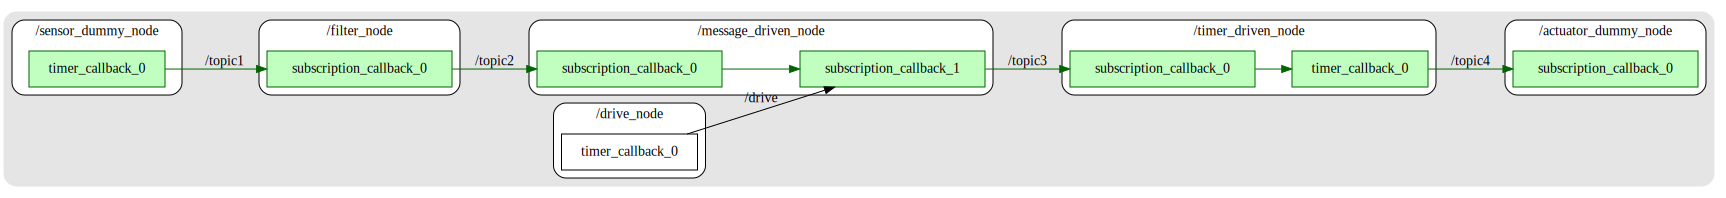

In [12]:
path = paths[0]
caret_plot.callback_graph(app, callbacks=path.callbacks)
# caret_plot.callback_graph(app, callbacks=path.callbacks, export_path='callback_graph.svg') # 画像として保存する場合はパスを指定

In [13]:
app.path['target_path'] = path
app.export_architecture('architecture.yaml')

In [14]:
! cat architecture.yaml

path_name_aliases:
- path_name: target_path
  callbacks:
  - /sensor_dummy_node/timer_callback_0
  - /filter_node/subscription_callback_0
  - /message_driven_node/subscription_callback_0
  - /message_driven_node/subscription_callback_1
  - /timer_driven_node/subscription_callback_0
  - /timer_driven_node/timer_callback_0
  - /actuator_dummy_node/subscription_callback_0
nodes:
- node_name: /actuator_dummy_node
  callbacks:
  - callback_name: subscription_callback_0
    type: subscription_callback
    topic_name: /topic4
    symbol: ActuatorDummy::ActuatorDummy(std::__cxx11::basic_string<char,std::char_traits<char>,std::allocator<char>>,std::__cxx11::basic_string<char,std::char_traits<char>,std::allocator<char>>)::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}
- node_name: /filter_node
  callbacks:
  - callback_name: subscription_callback_0
    type: subscription_callback
    topic_name: /topic1
    symbol: NoDependencyNode::NoDependencyNode(std::__cxx11::basic_string<char,std::cha